# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

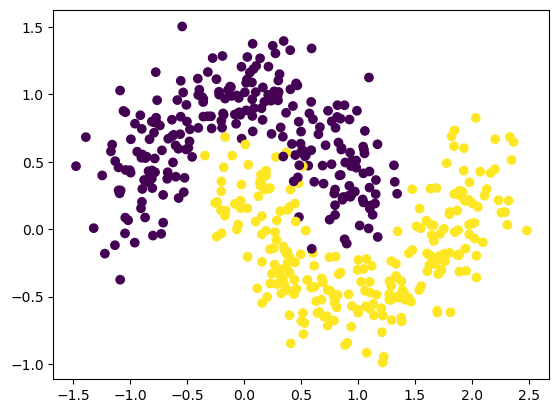

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


lr = LogisticRegression()  # add some params
svm = SVC(kernel="linear")  # here too

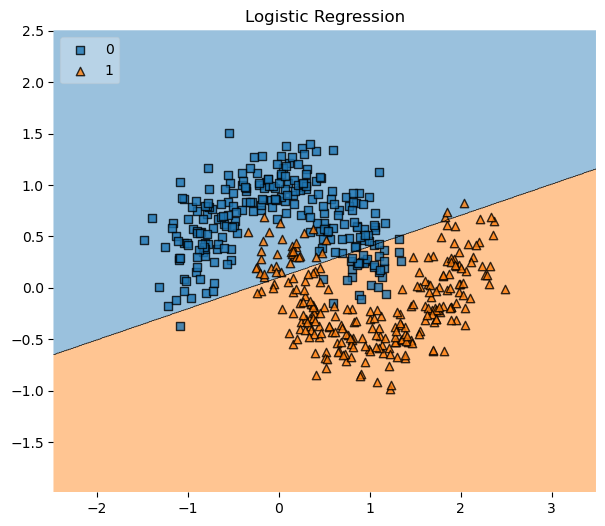

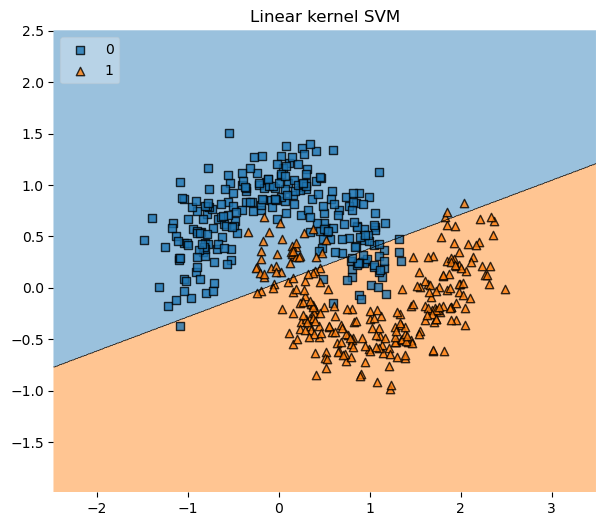

In [4]:
### YOUR CODE HERE

def plot_decisions(X_train, y_train, clf, name:str):
    
    fig = plt.figure(figsize=(7, 6))

    clf.fit(X_train, y_train)
    ax = plt.subplot()
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(name)
    plt.show()

plot_decisions(moons_points, moons_labels, lr, 'Logistic Regression')
plot_decisions(moons_points, moons_labels, svm, 'Linear kernel SVM')

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [5]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

In [6]:
parameters = {
    'C'      : np.logspace(-4, 4, 7),
    'gamma'  : np.logspace(-4, 1, 4),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree'   : np.arange(1, 5, 1),
}

grid = GridSearchCV(SVC(), parameters, cv=10, scoring='accuracy', n_jobs = -1)
grid.fit(moons_points, moons_labels)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00,
       2.15443469e+01, 4.64158883e+02, 1.00000000e+04]),
                         'degree': array([1, 2, 3, 4]),
                         'gamma': array([1.00000000e-04, 4.64158883e-03, 2.15443469e-01, 1.00000000e+01]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

Best params: {'C': 10000.0, 'degree': 1, 'gamma': 0.21544346900318845, 'kernel': 'rbf'}


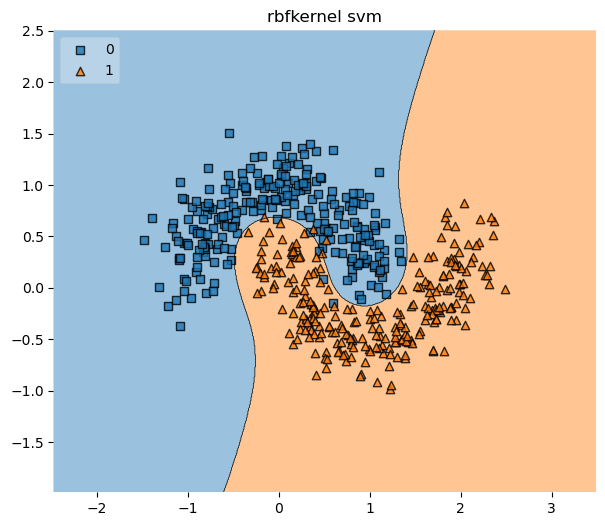

In [7]:
#знаю, выше нет номера запуска, но это какой-то баг jupyter
#как я понял, он из за того, что многопоток как-то убил вкладку с ноутбуком и мне пришлось её переоткрыть(
clf = grid.best_estimator_

best_params = grid.best_params_
print("Best params:", best_params)

plot_decisions(moons_points, moons_labels, clf, best_params['kernel'] + 'kernel svm')

### Комментарий к результату

Использование не прямой, а кривой разделяющей линии значительно повысило возможную точность резульата. Использование перебора позволило выделить модель, которая лучше всего справляется с поставленной задачей (лучшую модель и её параметры можно увидеть выше), но значительно увеличело время подбора модели

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [8]:
from sklearn.preprocessing import PolynomialFeatures


### YOUR CODE HERE
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [9]:
acc_arr = []
degrees = np.arange(1, 11, 1)

for degree in degrees:
    clf = LogisticRegression(C=0.1, tol=1e-3, penalty='l2', solver='saga', multi_class='multinomial')
    poly = PolynomialFeatures(degree=degree)
    data = poly.fit_transform(moons_points)
    clf.fit(data, moons_labels)
    acc_arr.append(accuracy_score(y_pred=clf.predict(data), y_true=moons_labels))

C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [10]:
acc_arr = np.array(acc_arr)
best_degree = degrees[np.argmax(acc_arr)]

best_clf = LogisticRegression(C=0.1, tol=1e-3, penalty='l2', solver='saga', multi_class='multinomial')

pipe = Pipeline([('poly_features', PolynomialFeatures(degree=best_degree)), ('logreg', best_clf)])

# optimal_poly = PolynomialFeatures(degree=best_degree)
# optimal_data = optimal_poly.fit_transform(moons_points)
# best_clf.fit(optimal_data, moons_labels)

pipe.fit(moons_points, moons_labels)

C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('logreg',
                 LogisticRegression(C=0.1, multi_class='multinomial',
                                    solver='saga', tol=0.001))])

C:\Users\nota0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy: 0.938
Best degree: 4


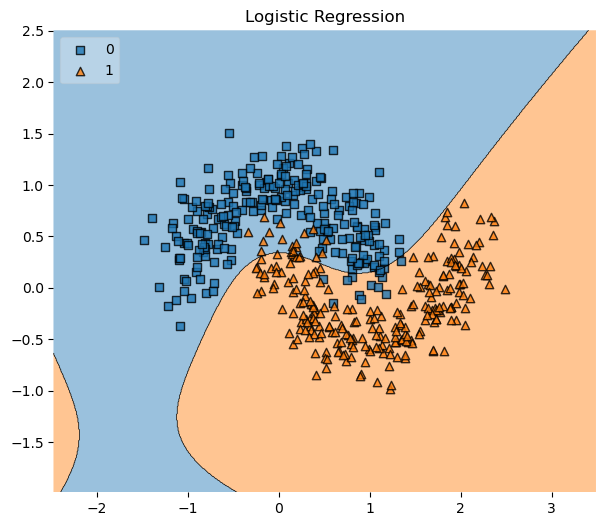

In [11]:
print("accuracy:", pipe.score(moons_points, moons_labels))
print("Best degree:", best_degree)

plot_decisions(X_train=moons_points, y_train=moons_labels, clf=pipe, name='Logistic Regression' )

### Комментарий к результату

Результат разделения получился значительно хуже (как видно модель плохо справляется с концами групп, которые входят в другую группу) + разделение выходит странноватым, слева снизу какая-то дополнительная область. Параметры результата можно увидеть выше.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

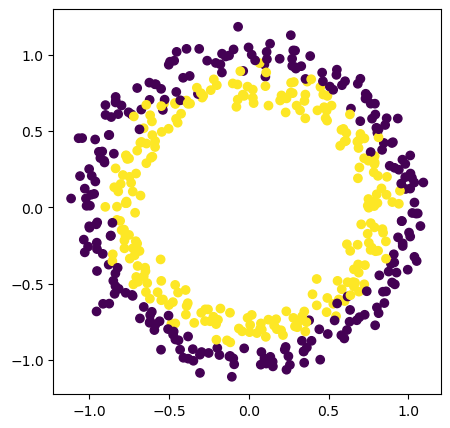

In [12]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

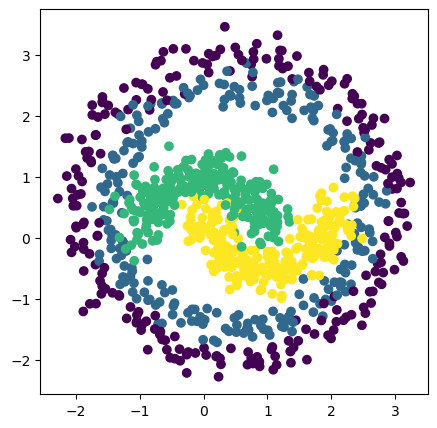

In [13]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [14]:
### YOUR CODE HERE
parameters = {
    'C'      : np.logspace(-4, 4, 20),
    'gamma'  : np.logspace(-4, 1, 20),
    'degree'   : np.arange(1, 5, 1),
}

grid = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, scoring='accuracy', n_jobs = -1)
grid.fit(circles_points, circles_labels)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+...
                         'degree': array([1, 2, 3, 4]),
                         'gamma': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01])},
             scoring='accuracy')

Best param: {'C': 1438.44988828766, 'degree': 1, 'gamma': 0.012742749857031334}
accuracy 0.938


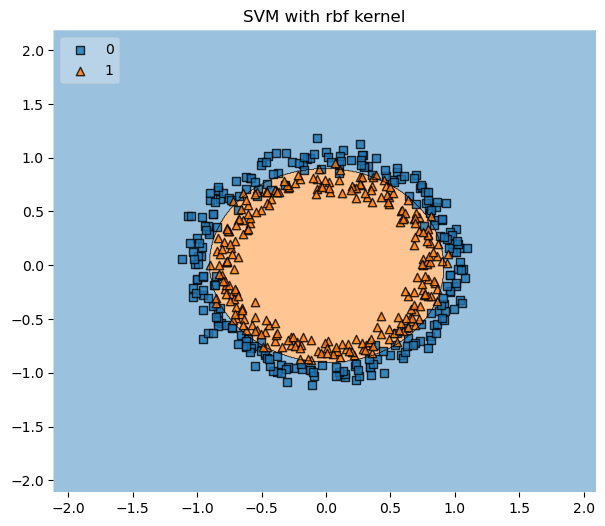

In [15]:
clf = grid.best_estimator_
best_params = grid.best_params_

print("Best param:", best_params)

print("accuracy", clf.score(circles_points, circles_labels))

plot_decisions(X_train=circles_points, y_train=circles_labels, clf=clf, name='SVM with rbf kernel')

In [16]:
parameters = {
    'C'      : np.logspace(-4, 4, 20),
    'gamma'  : np.logspace(-4, 1, 20),
    'degree'   : np.arange(1, 5, 1),
}

grid = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10, scoring='accuracy', n_jobs = -1)
grid.fit(points, labels)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+...
                         'degree': array([1, 2, 3, 4]),
                         'gamma': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01])},
             scoring='accuracy')

Best parameters: {'C': 78.47599703514607, 'degree': 1, 'gamma': 0.14384498882876628}
accuracy: 0.942


C:\Users\nota0\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


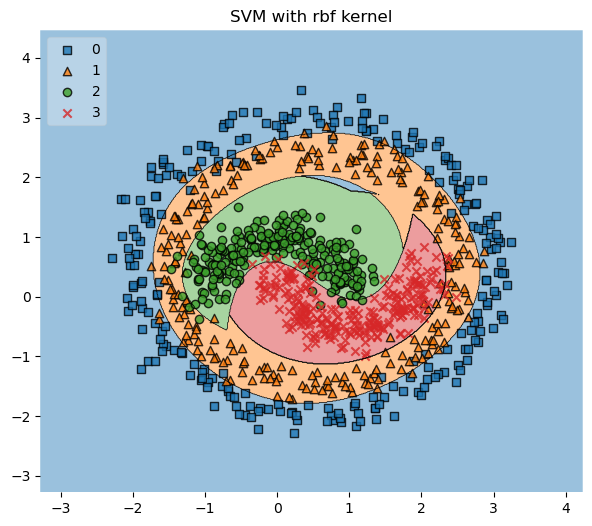

In [17]:
clf = grid.best_estimator_
best_params = grid.best_params_

print("Best parameters:", best_params)

print("accuracy:", clf.score(points, labels))

plot_decisions(X_train=points, y_train=labels, clf=clf, name='SVM with rbf kernel')